# Machine Learning Diagnostics


## Authors
V. Aquiviva, B.W. Holwerda

## Learning Goals
* introduction to a "machine learning" algorithm diagnostics
* accuracy
* precision
* recall
* confusion matrix

## Keywords
clustering, precision and recall, confusion matrix, diagnostics

## Companion Content

## Summary
This assignment teaches how to evaluate the performance of a classifying algorithm. The precision and recall of an algorithm on a test set and the confusion matrix.

<hr>

## Student Name and ID:



## Date:

<hr>

### Accompanying notebook for Chapter 3 

In [5]:
import pandas as pd
import numpy as np
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from scipy import stats
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn import neighbors

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [6]:
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

In [7]:
import matplotlib
font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

## Cleaning and preparing Science data

Data from http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database

First thing we do in load in the catalog and clean and prepare it. This is an important step before any Machine Learning (or any other analysis for that matter).

Cleaning involves consolidating categories and removing or replacing missing values.

In [8]:
df = pd.read_csv('phl_exoplanet_catalog.csv', sep = ',')

In [9]:
df.columns

Index(['P_NAME', 'P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_UPDATED',
       ...
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST'],
      dtype='object', length=112)

In [10]:
df.describe()

P_STATUS        P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
count    4048.0   1598.000000       1467.000000       1467.000000   
mean        3.0    798.384920       -152.292232        190.289692   
std         0.0   1406.808654        783.366353       1082.061976   
min         3.0      0.019070     -24965.390000          0.000000   
25%         3.0     26.548968        -79.457001          4.449592   
50%         3.0    273.332080        -24.154928         25.108412   
75%         3.0    806.488560         -4.392383         85.813561   
max         3.0  17668.059000          0.270000      26630.808000   

          P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX       P_YEAR  \
count  3139.000000         3105.000000         3105.000000  4048.000000   
mean      4.191426           -0.483990            0.621867  2014.212945   
std       4.776830            1.409048            2.007592     3.704839   
min       0.336300          -54.592700            0.000000  1989.000000   
25%       1.569400           -0.526870            0.145730  2014.000000   
50%       2.331680           -0.235410            0.325090  2016.000000   
75%       3.553570           -0.134520            0.661390  2016.000000   
max      77.349000            0.450000           68.919080  2019.000000   

           P_PERIOD  P_PERIOD_ERROR_MIN  ...  S_SNOW_LINE   S_ABIO_ZONE  \
count  3.938000e+03        3.807000e+03  ...  3786.000000  3.083000e+03   
mean   2.309342e+03       -1.073631e+03  ...     3.513348  1.768991e+35   
std    1.167012e+05        5.943181e+04  ...     5.463171  6.944274e+36   
min    9.070629e-02       -3.650000e+06  ...     0.002405  7.293660e-05   
25%    4.497336e+00       -1.129000e-03  ...     1.740762  5.264169e-01   
50%    1.187053e+01       -9.392000e-05  ...     2.568600  1.429118e+00   
75%    4.186661e+01       -1.594000e-05  ...     3.661581  2.641037e+00   
max    7.300000e+06        3.200000e-02  ...   104.112780  2.726899e+38   

       S_TIDAL_LOCK  P_HABZONE_OPT  P_HABZONE_CON  P_HABITABLE        P_ESI  \
count   3281.000000    4048.000000    4048.000000  4048.000000  3721.000000   
mean       0.440103       0.049654       0.034091     0.021986     0.261252   
std        0.074285       0.217256       0.181485     0.195731     0.131333   
min        0.030707       0.000000       0.000000     0.000000     0.006768   
25%        0.420337       0.000000       0.000000     0.000000     0.196982   
50%        0.448357       0.000000       0.000000     0.000000     0.271192   
75%        0.472140       0.000000       0.000000     0.000000     0.303346   
max        1.322542       1.000000       1.000000     2.000000     0.931208   

       P_RADIUS_EST    P_MASS_EST  P_SEMI_MAJOR_AXIS_EST  
count   4048.000000   4048.000000            3978.000000  
mean       5.588647    323.089993               4.011385  
std        5.392733    965.084290              62.389968  
min        0.000000      0.000000               0.004400  
25%        1.703920      3.628101               0.053000  
50%        2.667980      7.815324               0.102199  
75%       11.770500    149.379160               0.260507  
max       77.349000  17668.059000            2500.000000  

[8 rows x 98 columns]

In [11]:
df.groupby('P_HABITABLE').count()

P_NAME  P_STATUS  P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
P_HABITABLE                                                                 
0              3993      3993    1575              1444              1444   
1                21        21      16                16                16   
2                34        34       7                 7                 7   

             P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR  \
P_HABITABLE                                                             
0                3101                3067                3067    3993   
1                   9                   9                   9      21   
2                  29                  29                  29      34   

             P_UPDATED  ...  P_HABZONE_OPT  P_HABZONE_CON  P_TYPE_TEMP  P_ESI  \
P_HABITABLE             ...                                                     
0                 3993  ...           3993           3993         3666   3666   
1                   21  ...             21             21           21     21   
2                   34  ...             34             34           34     34   

             S_CONSTELLATION  S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  \
P_HABITABLE                                                              
0                       3993                 3993                 3993   
1                         21                   21                   21   
2                         34                   34                   34   

             P_RADIUS_EST  P_MASS_EST  P_SEMI_MAJOR_AXIS_EST  
P_HABITABLE                                                   
0                    3993        3993                   3923  
1                      21          21                     21  
2                      34          34                     34  

[3 rows x 111 columns]

#### Start by lumping together Probably and Possibly Habitable

Habitable and "probably habitable" can be combined into one category. We are interesting in binary classification of this dataset.

In [12]:
bindf = df.drop('P_HABITABLE', axis = 1) #This has the binary classification

In [13]:
bindf['P_HABITABLE'] = (np.logical_or((df.P_HABITABLE == 1) , (df.P_HABITABLE == 2))) #turn into binary

bindf['P_HABITABLE'] = bindf['P_HABITABLE'].astype(int)

In [14]:
bindf.head()

P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0    11 Com b       3.0  6165.86330        -476.74200         476.74200   
1    11 UMi b       3.0  4684.78480        -794.57001         794.57001   
2    14 And b       3.0  1525.57440               NaN               NaN   
3    14 Her b       3.0  1481.07850         -47.67420          47.67420   
4  16 Cyg B b       3.0   565.73385         -25.42624          25.42624   

   P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR   P_UPDATED  ...  \
0       NaN                 NaN                 NaN    2007  2014-05-14  ...   
1       NaN                 NaN                 NaN    2009  2018-09-06  ...   
2       NaN                 NaN                 NaN    2008  2014-05-14  ...   
3       NaN                 NaN                 NaN    2002  2018-09-06  ...   
4       NaN                 NaN                 NaN    1996  2018-09-06  ...   

   P_HABZONE_CON  P_TYPE_TEMP     P_ESI  S_CONSTELLATION  S_CONSTELLATION_ABR  \
0              0          Hot  0.083813   Coma Berenices                  Com   
1              0          Hot  0.082414       Ursa Minor                  UMi   
2              0          Hot  0.081917        Andromeda                  And   
3              0         Cold  0.145241         Hercules                  Her   
4              1         Warm  0.368627           Cygnus                  Cyg   

   S_CONSTELLATION_ENG  P_RADIUS_EST  P_MASS_EST  P_SEMI_MAJOR_AXIS_EST  \
0      Berenice's Hair     12.082709  6165.86330                   1.29   
1          Little Bear     12.229641  4684.78480                   1.53   
2            Andromeda     12.848516  1525.57440                   0.83   
3             Hercules     12.865261  1481.07850                   2.93   
4                 Swan     13.421749   565.73385                   1.66   

   P_HABITABLE  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 112 columns]

### Exercise 1

Why do you think it is ok to consolidate the "habitable" and "probably habitable" categories? Motive briefly your answer.

*student answer here*

### Let's select some columns.

S_MAG - star magnitude 

S_DISTANCE - star distance (parsecs)

S_METALLICITY - star metallicity (dex)

S_MASS - star mass (solar units)

S_RADIUS - star radius (solar units)

S_AGE - star age (Gy)

S_TEMPERATURE - star effective temperature (K)

S_LOG_G - star log(g)

P_DISTANCE - planet mean distance from the star (AU) 

P_FLUX - planet mean stellar flux (earth units)

P_PERIOD - planet period (days) 

### Going with the same features as Chapter 2.

We will be using three features (for which we have the most data) for use on the ML.

In [15]:
final_features = bindf[['S_MASS', 'P_PERIOD', 'P_DISTANCE']] 

In [16]:
targets = bindf.P_HABITABLE

In [17]:
final_features

S_MASS     P_PERIOD  P_DISTANCE
0       2.70   326.030000    1.324418
1       2.78   516.219970    1.534896
2       2.20   185.840000    0.830000
3       0.90  1773.400000    3.130558
4       1.08   798.500000    2.043792
...      ...          ...         ...
4043    0.41    28.165600    0.134560
4044    0.41     7.906961    0.057690
4045    0.12     3.204000    0.021000
4046    0.12     6.689000    0.035000
4047    0.12    13.031000    0.054000

[4048 rows x 3 columns]

### There are some NaNs, as also shown by the "describe" property, which only counts numbers

NaN or Not-a-number values in a dataset can throw the results. Check your data for them and remove. 

In [18]:
final_features.shape

(4048, 3)

In [19]:
final_features.describe()

S_MASS      P_PERIOD   P_DISTANCE
count  3283.000000  3.938000e+03  3978.000000
mean      1.003838  2.309342e+03     4.047677
std       0.652903  1.167012e+05    62.435994
min       0.010000  9.070629e-02     0.004408
25%       0.810000  4.497336e+00     0.053110
50%       0.970000  1.187053e+01     0.103000
75%       1.130000  4.186661e+01     0.263415
max      23.560000  7.300000e+06  2500.000000

### Counting missing data...

In [20]:
for i in range(final_features.shape[1]):
    print(len(np.where(final_features.iloc[:,i].isna())[0]))

765
110
70


### ...and getting rid of them (Note: there are better imputing strategies!)

In [21]:
final_features = final_features.dropna(axis = 0) #gets rid of any instance with at least one NaN in any column
final_features.shape

(3180, 3)

### Exercise 2

How many entries were dropped from the dataset because of a NaN entry? 

what would be an alternate strategy if you do not want to drop data entries?

*student answer here*

### Searching for outliers

a last and crucial step in preparing the data is to check for outliers that could skew results. There are several ways to identify outliers like this. 

### Method 1 - plot!

You should always inspect your data in a plot. Outliers will stand out immediately. 

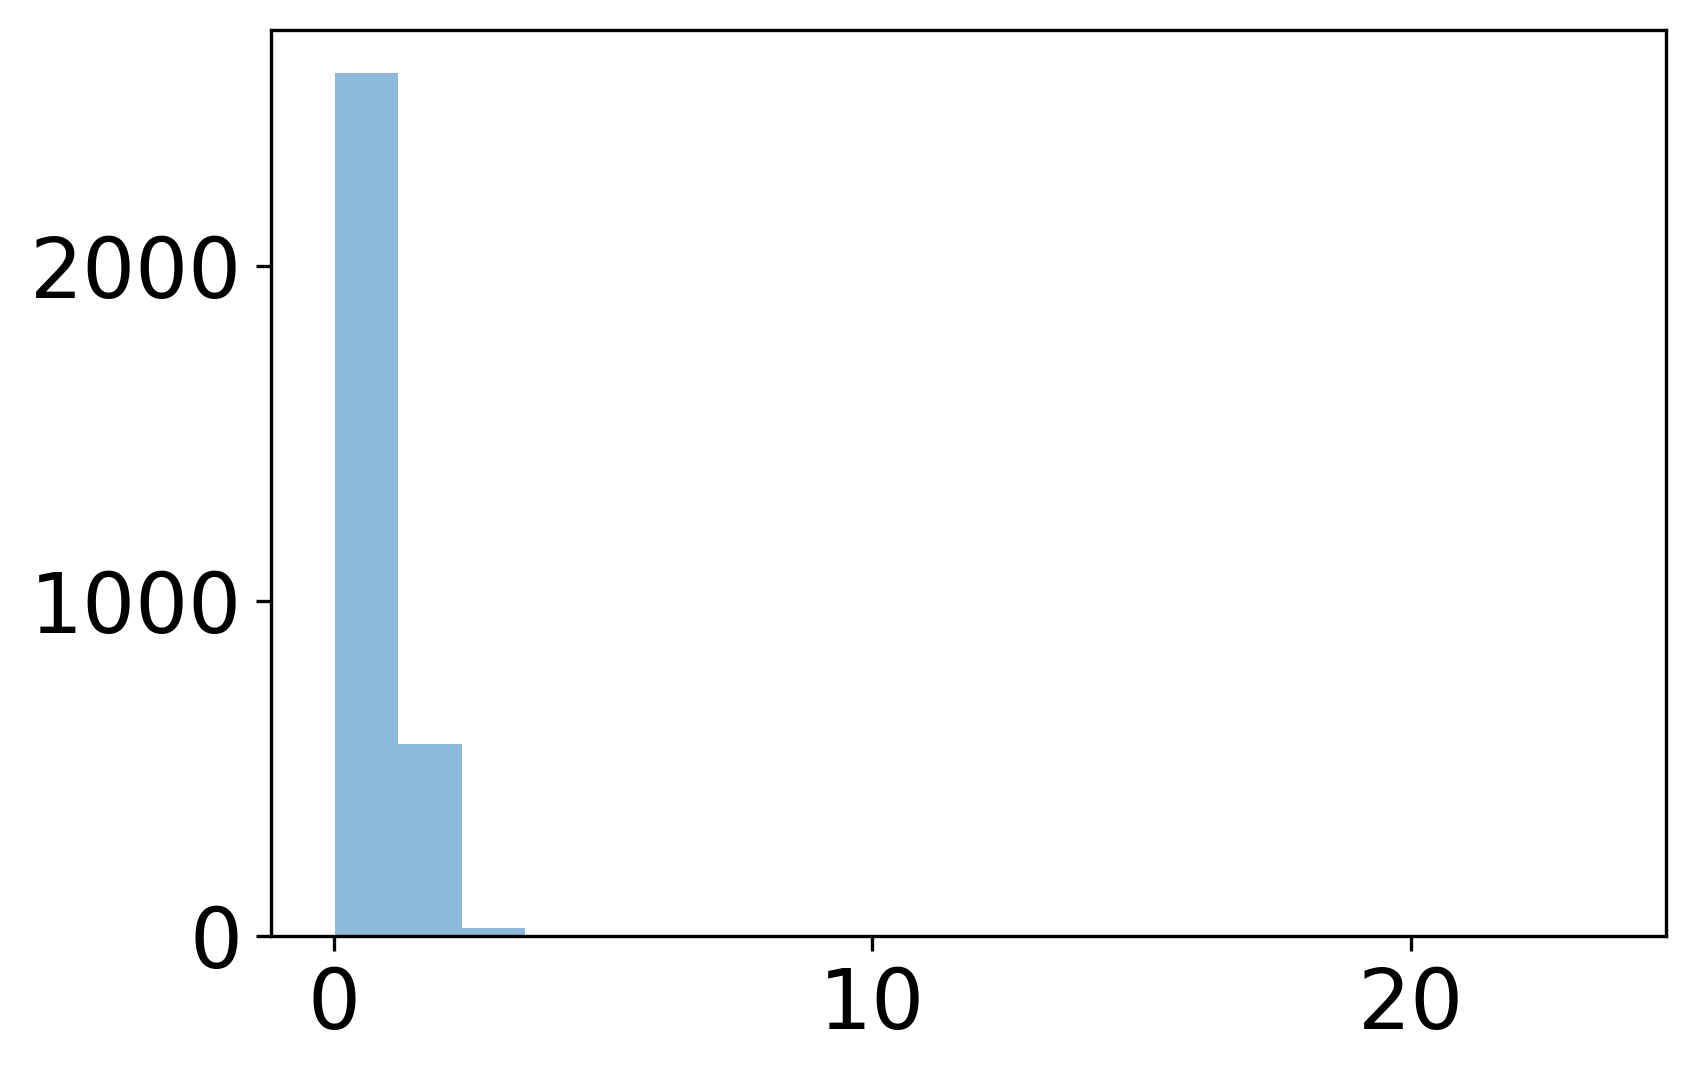

In [22]:
plt.hist(final_features.iloc[:,0], bins = 20, alpha = 0.5);

There is a remarkable outlier; The same happens for other features. But we could have also known from the difference between mean and median (which, in fact, is even more pronounced for orbital distance and period).

In [23]:
final_features.describe()

S_MASS      P_PERIOD   P_DISTANCE
count  3180.000000  3.180000e+03  3180.000000
mean      1.018217  2.763531e+03     0.677663
std       0.649450  1.298246e+05     5.962161
min       0.020000  9.070629e-02     0.004408
25%       0.820000  4.175797e+00     0.050453
50%       0.970000  1.155546e+01     0.097369
75%       1.130000  5.474041e+01     0.274581
max      23.560000  7.300000e+06   243.000000

### Method 2 -  Sigma Clip

Clip out any feature that is more than 5 standard deviations from the mean. 

In [24]:
final_features = final_features[(np.abs(stats.zscore(final_features)) < 5).all(axis=1)] 

#This eliminates > 5 sigma outliers; however it counts from the mean so it might not be ideal

In [25]:
targets = targets[final_features.index]

### Now reset index.

reset index on features and labels, not without the outliers.

In [26]:
final_features = final_features.reset_index(drop=True)

In [27]:
final_features

S_MASS     P_PERIOD  P_DISTANCE
0       2.70   326.030000    1.324418
1       2.78   516.219970    1.534896
2       2.20   185.840000    0.830000
3       0.90  1773.400000    3.130558
4       1.08   798.500000    2.043792
...      ...          ...         ...
3166    0.41    28.165600    0.134560
3167    0.41     7.906961    0.057690
3168    0.12     3.204000    0.021000
3169    0.12     6.689000    0.035000
3170    0.12    13.031000    0.054000

[3171 rows x 3 columns]

### And don't forget to do the same for the label vector.

In [28]:
targets = targets.reset_index(drop=True)

In [29]:
targets

0       0
1       0
2       0
3       0
4       0
       ..
3166    1
3167    0
3168    0
3169    1
3170    1
Name: P_HABITABLE, Length: 3171, dtype: int64

### Exercise 3

Compare the shape of targets, how many outliers were removed?

Is that a prohibitive large fraction of the data? 

In [30]:
# student work here


*student answer here*

### Check balance of data set

How is the dataset balanced? are there the same number of entries for each label? 

In [31]:
#Simple way: count 0/1s, get fraction of total

In [32]:
np.sum(targets)/len(targets)

0.01639861242510249

In [33]:
np.bincount(targets) #this shows the distribution of the two classes

array([3119,   52])

### Exercise 4

Is the dataset balanced? Which kind of entry is in the majority? 

*student work here*

### We can also explore the data by class, to get a sense of how the two classes differ from one another. For this, we need to concatenate the feature//labels data frames so we group objects label.

In [34]:
#This generates a "view", not a new data frame

pd.concat([final_features, targets], axis=1)

S_MASS     P_PERIOD  P_DISTANCE  P_HABITABLE
0       2.70   326.030000    1.324418            0
1       2.78   516.219970    1.534896            0
2       2.20   185.840000    0.830000            0
3       0.90  1773.400000    3.130558            0
4       1.08   798.500000    2.043792            0
...      ...          ...         ...          ...
3166    0.41    28.165600    0.134560            1
3167    0.41     7.906961    0.057690            0
3168    0.12     3.204000    0.021000            0
3169    0.12     6.689000    0.035000            1
3170    0.12    13.031000    0.054000            1

[3171 rows x 4 columns]

In [35]:
#We can group by label and take a look at summary statistics

pd.concat([final_features, targets], axis=1).groupby('P_HABITABLE').describe(percentiles = [])

S_MASS                                        P_PERIOD  \
              count      mean       std   min    50%   max    count   
P_HABITABLE                                                           
0            3119.0  1.003520  0.341290  0.02  0.980  4.26   3119.0   
1              52.0  0.486538  0.285079  0.08  0.475  1.12     52.0   

                                                                        \
                   mean          std       min        50%          max   
P_HABITABLE                                                              
0            296.532141  1340.624871  0.090706  11.230000  43500.00000   
1             91.035689   100.689713  4.049610  47.481208    448.30356   

            P_DISTANCE                                                     
                 count      mean       std       min       50%        max  
P_HABITABLE                                                                
0               3119.0  0.534470  1.370882  0.004408  0.095352  25.426153  
1                 52.0  0.302263  0.276637  0.021493  0.205800   1.190229

### Preparation done.

Ok, this all for preliminary data exploration. Time to deploy! split into a training and test set.

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(final_features,targets,random_state=2)

In [37]:
Xtrain.shape, Xtest.shape

((2378, 3), (793, 3))

### Exercise 5

We can just take a look at the train/test sets. Plot the mass of the parent star ('S_MASS'), which is in Earth Mass units against the period of the planet ('P_PERIOD'), which is in days. Color code by habitability or not. make the y-axis logarithmic and provide a legend. 

In [40]:
# student work here.


### Questions: 

- Based on this graph, would you expect DT or kNN to perform better? Why?
    
- What kind of performance can we expect (qualitatively, is the information sufficient?) Do you expect to have latent (hidden) variables that might affect the outcome beyond those that we have?



*student answers here*

In [42]:
model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(random_state=3)

#### Let's visualize the graph!

In [43]:
from sklearn import tree
plt.figure(figsize=(140,50))  # customize according to the size of your tree
tree.plot_tree(model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'])
plt.show()

### Question: Can you predict the accuracy score on the train set?

### Let's take a look at train/test scores.

Accuracy computes how often the ML algorithm got the correct answer. 

In [44]:
print(metrics.accuracy_score(ytrain, model.predict(Xtrain)))
print(metrics.accuracy_score(ytest, model.predict(Xtest)))

1.0
0.987389659520807


This looks pretty high, but how does it compare with the accuracy of a lazy classifier that places everything in the "not habitable" category?

In [45]:
#Dummy classifier

print(metrics.accuracy_score(ytest,np.zeros(len(ytest))))

0.9836065573770492


### Exercise 6

Why do you think the accuracy of the dummy classifier is so high?

*student answer here*

### We can look at other metrics.

The other two metrics are precison and recall. 

Precision: the fraction of the selected elements that is correctly selected.

Recall: the fraction of correct elements that is selected.

See this illustration from the wikipedia entry:
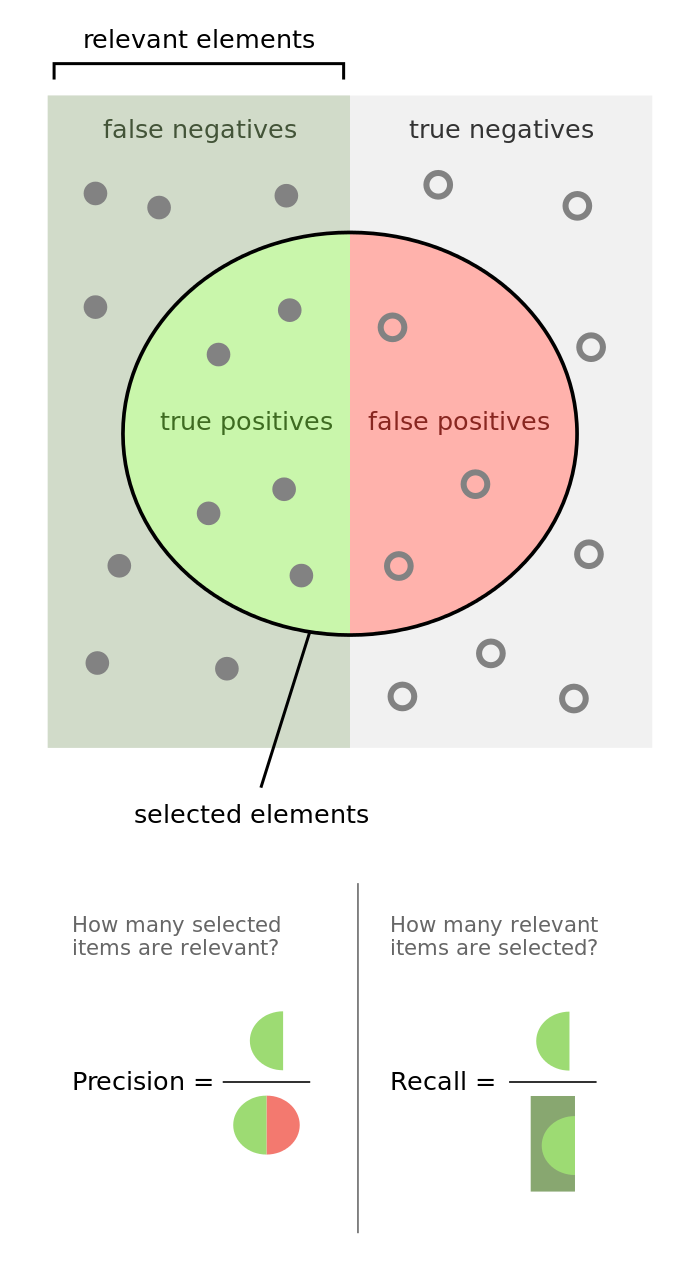

In [46]:
print(metrics.precision_score(ytest,model.predict(Xtest)))

0.6153846153846154


In [47]:
print(metrics.recall_score(ytest,model.predict(Xtest)))

0.6153846153846154


Not perfect, but not horrible.

### Exercise 7

What would the precision and recall for the training set be? 
Does that tell us anything?

In [48]:
# student work here


In [49]:
np.sum(model.predict(Xtest)), np.sum(ytest)

(13, 13)

### You know what we would need in order to understand exactly how the model is working? A confusion matrix!

In [50]:
# definition of the confusion matrix function:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(7,6))
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="green" if i == j else "red", fontsize = 30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### We can plot the confusion matrix (note that so far, we have only looked at one test fold)

Confusion matrix, without normalization
[[775   5]
 [  5   8]]


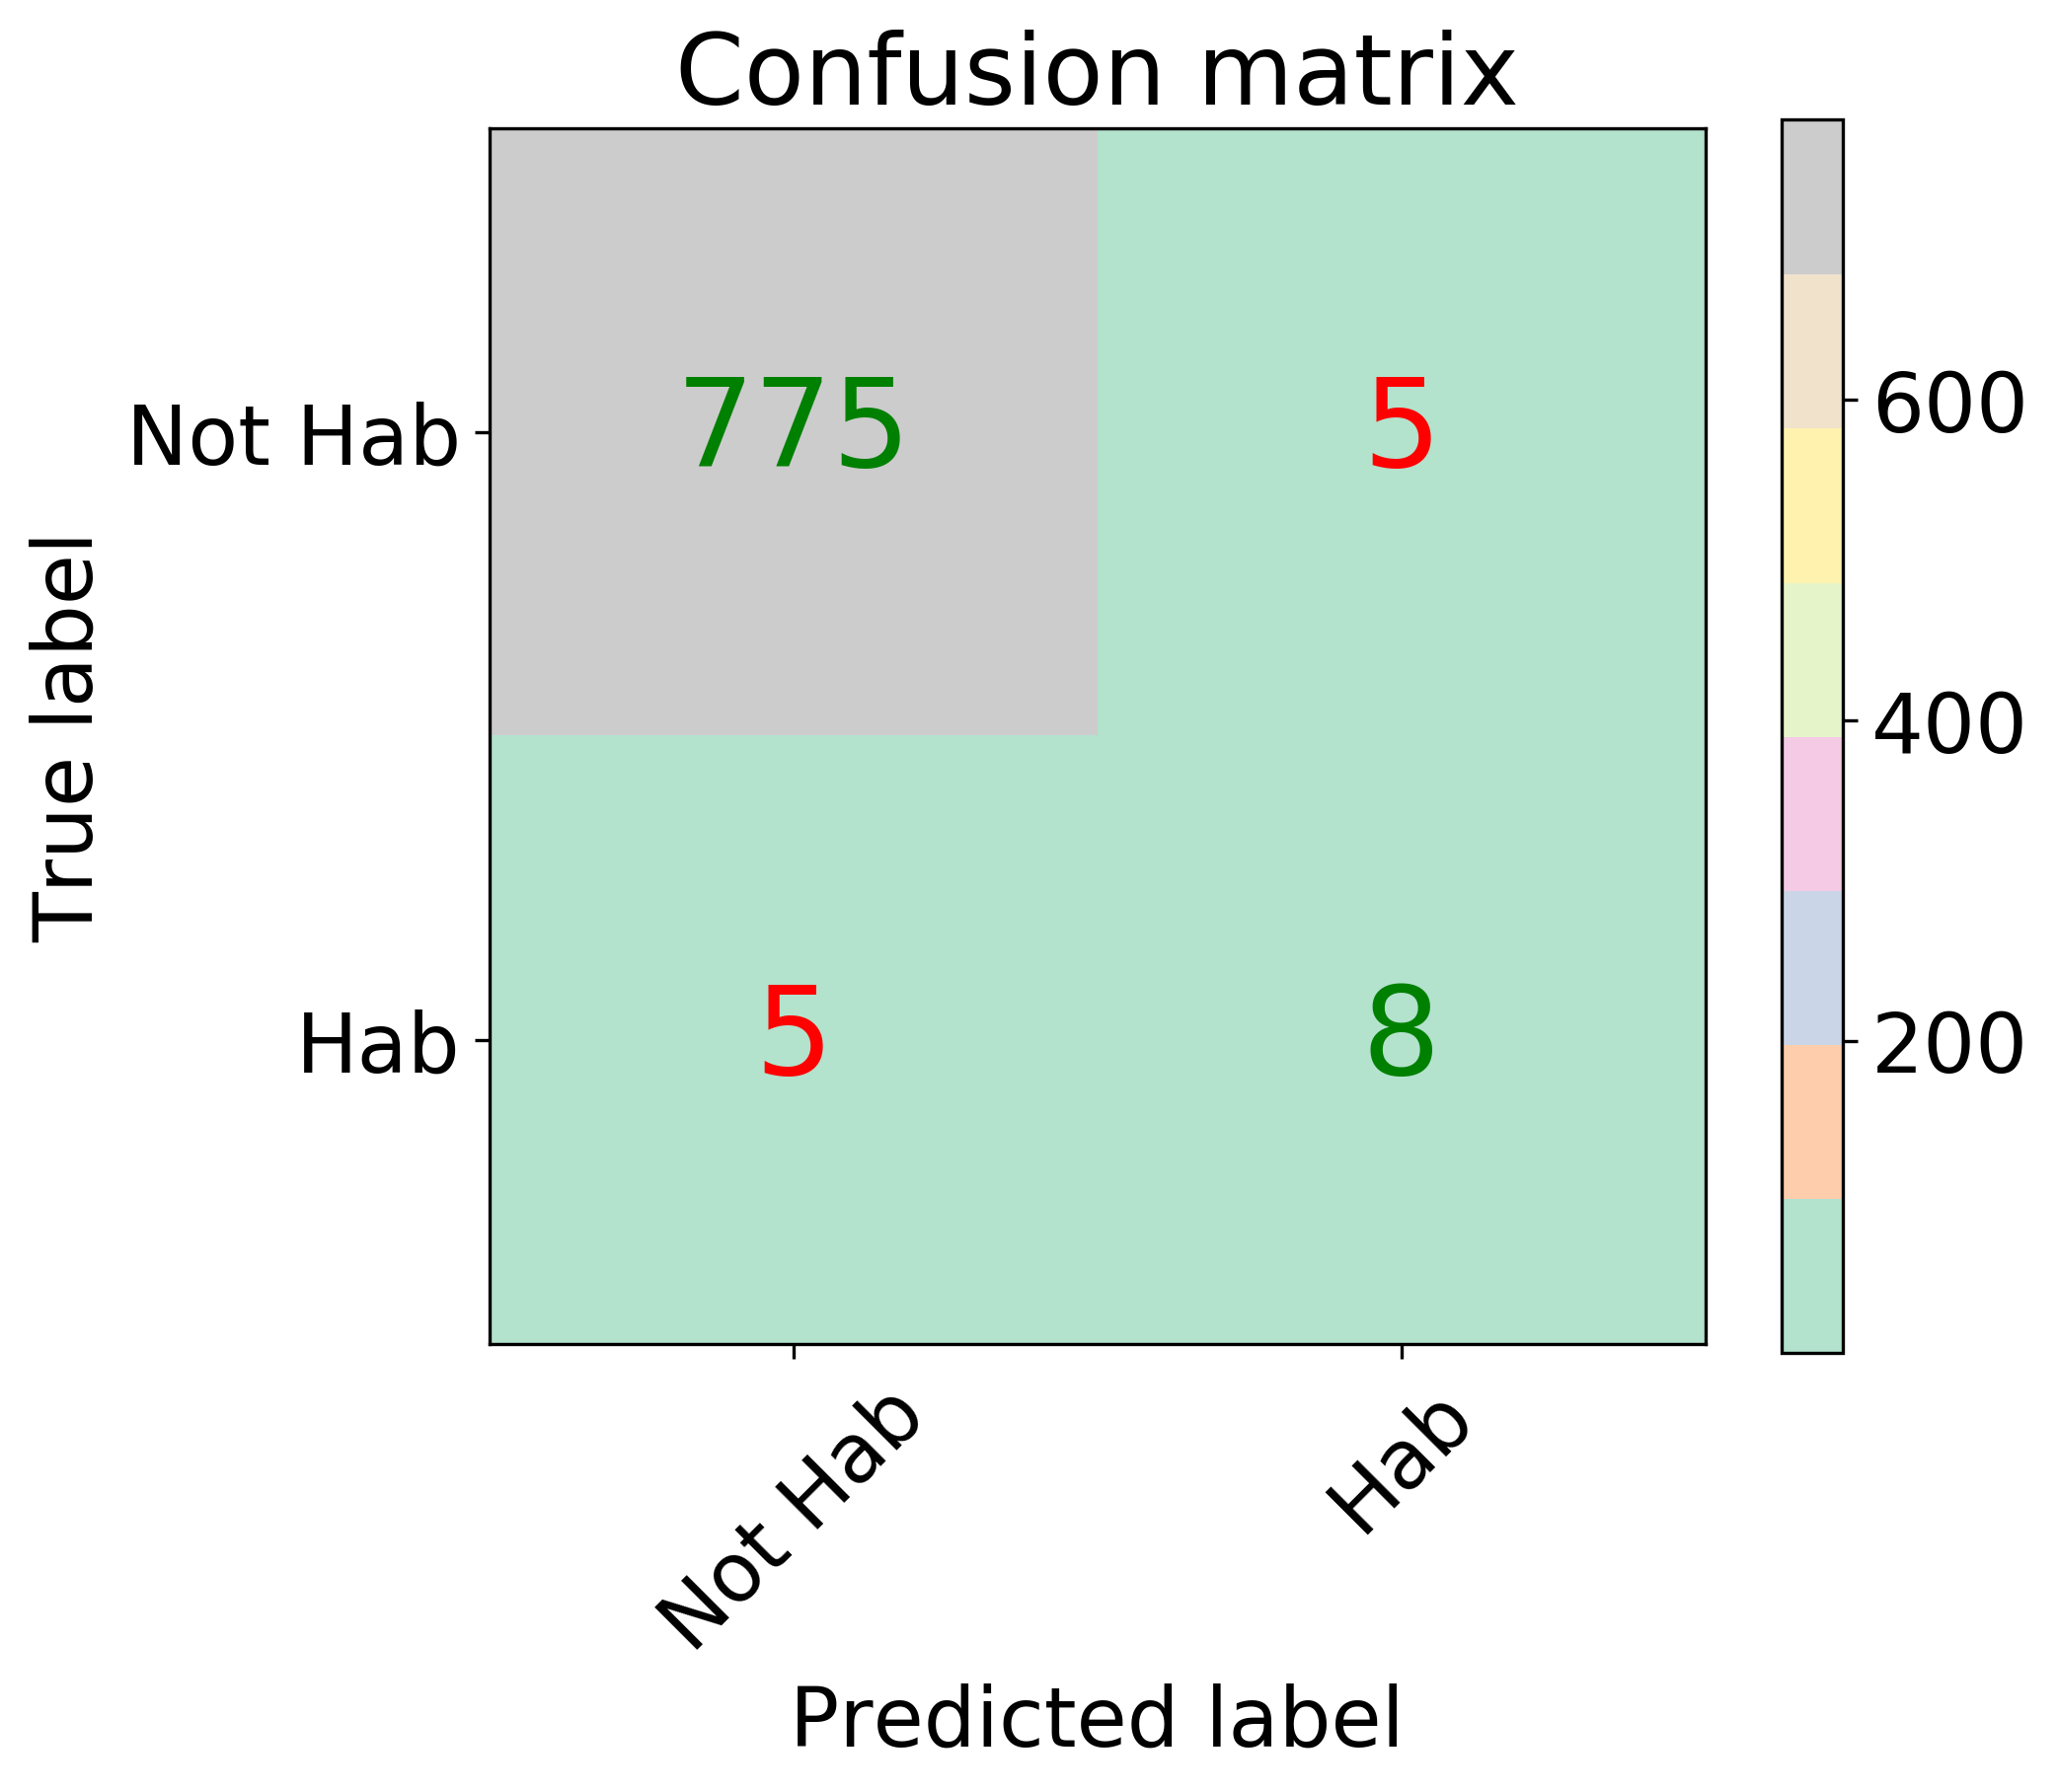

In [51]:
cm = metrics.confusion_matrix(ytest,model.predict(Xtest))
plot_confusion_matrix(cm, ['Not Hab','Hab'], cmap = plt.cm.Pastel2)
#plt.savefig('CM.png', dpi = 300)

### Exercise 8

How many mis-classifications are there? How many false positives? How many false negatives?
How often did the classifier got the classification correct? 

*student answer here*

### Three flavors of k-fold Cross Validation.

Note: you can fix the random seed for exactly reproducible behavior.

We will run three different settings of the same ML algorithm and compare.

In [52]:
# This is the standard version. Important: it doesn't shuffle the data, 
# so if your positive examples are all at the beginning or all the end, it might lead to disastrous results.

cv1 = KFold(n_splits = 5)

#This is v2: shuffling added (recommended!)

cv2 = KFold(shuffle = True, n_splits = 5, random_state=5)

# STRATIFICATION ensures that the class distributions in each split resembles those of the 
# entire data set (mightscores1['test_score'].mean(), scores1['test_score'].std()scores1['test_score'].mean(), scores1['test_score'].std()### Effect of stratification: let's look at the class count in each set of splits.

cv3 = StratifiedKFold(shuffle = True, n_splits = 5, random_state=5)

for train, test in cv1.split(final_features, targets):
    print('train -  {}   |   test -  {}'.format(
    np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

for train, test in cv2.split(final_features, targets):
    print('train -  {}   |   test -  {}'.format(
    np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

for train, test in cv3.split(final_features, targets):
    print('train -  {}   |   test -  {}'.format(
    np.bincount(targets.loc[train]), np.bincount(targets.loc[test]))) 


train -  [2493   43]   |   test -  [626   9]
train -  [2491   46]   |   test -  [628   6]
train -  [2488   49]   |   test -  [631   3]
train -  [2506   31]   |   test -  [613  21]
train -  [2498   39]   |   test -  [621  13]
train -  [2491   45]   |   test -  [628   7]
train -  [2496   41]   |   test -  [623  11]
train -  [2498   39]   |   test -  [621  13]
train -  [2493   44]   |   test -  [626   8]
train -  [2498   39]   |   test -  [621  13]
train -  [2495   41]   |   test -  [624  11]
train -  [2495   42]   |   test -  [624  10]
train -  [2495   42]   |   test -  [624  10]
train -  [2495   42]   |   test -  [624  10]
train -  [2496   41]   |   test -  [623  11]


### Effect of stratification: let's look at the class count in each set of splits.

In [53]:
for train, test in cv1.split(final_features, targets): #Just how they are in original data set
...     print('train -  {}   |   test -  {}'.format(
...         np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

train -  [2493   43]   |   test -  [626   9]
train -  [2491   46]   |   test -  [628   6]
train -  [2488   49]   |   test -  [631   3]
train -  [2506   31]   |   test -  [613  21]
train -  [2498   39]   |   test -  [621  13]


In [54]:
for train, test in cv2.split(final_features, targets): #One random selection
...     print('train -  {}   |   test -  {}'.format(
...         np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

train -  [2491   45]   |   test -  [628   7]
train -  [2496   41]   |   test -  [623  11]
train -  [2498   39]   |   test -  [621  13]
train -  [2493   44]   |   test -  [626   8]
train -  [2498   39]   |   test -  [621  13]


In [55]:
for train, test in cv3.split(final_features, targets): #One adjusted-for random selection
...     print('train -  {}   |   test -  {}'.format(
...         np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

train -  [2495   41]   |   test -  [624  11]
train -  [2495   42]   |   test -  [624  10]
train -  [2495   42]   |   test -  [624  10]
train -  [2495   42]   |   test -  [624  10]
train -  [2496   41]   |   test -  [623  11]


#### The handy function cross\_validate provides the scores (specified by the chosen scoring parameter), in dictionary form.

In [56]:
scores1 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv1, scoring = 'accuracy')

scores2 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv2, scoring = 'accuracy')

scores3 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv3, scoring = 'accuracy')

In [57]:
scores1

{'fit_time': array([0.00649214, 0.00515795, 0.00496101, 0.00573301, 0.00446177]),
 'score_time': array([0.00208497, 0.00169802, 0.00169206, 0.00184989, 0.00248718]),
 'test_score': array([0.97007874, 0.98107256, 0.99053628, 0.97318612, 0.9873817 ])}

#### We can now calculate an average and standard deviation.

In [58]:
scores1['test_score'].mean(), scores1['test_score'].std()

(0.98045107926178, 0.00788030536514336)

In [59]:
scores2['test_score'].mean(), scores2['test_score'].std()

(0.9823383591246678, 0.006343783359071027)

In [60]:
scores3['test_score'].mean(), scores3['test_score'].std()

(0.9820248888447305, 0.005517241420850409)

### Exercise 9 

Are the differences between the three instances of the Decision Tree statistically significant in thier accuracy?

*student answer here*

### Let's now use recall as our scoring parameter. Will the model change?

In [61]:
scores1 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv1, scoring = 'recall')

scores2 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv2, scoring = 'recall')

scores3 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv3, scoring = 'recall')

In [62]:
print(scores1['test_score'].mean(), scores1['test_score'].std())
print(scores2['test_score'].mean(), scores2['test_score'].std())
print(scores3['test_score'].mean(), scores3['test_score'].std())

0.6210012210012209 0.23081199415138723
0.4528471528471528 0.163515316546343
0.4654545454545455 0.16806138193878317


### Exercise 10 

Are the differences between the three instances of the Decision Tree statistically significant in their recall?
Which instant is better? 

*student answer here*

### If desired, I can ask for the train scores as well. This is very helpful when diagnosing bias vs variance.

In [63]:
scores1 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv1, scoring = 'recall', \
                         return_train_score = True)

scores2 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv2, scoring = 'recall', \
                         return_train_score = True)

scores3 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv3, scoring = 'recall', 
                         return_train_score = True)

In [64]:
print(scores1['test_score'].mean(), scores1['train_score'].mean())
print(scores2['test_score'].mean(), scores2['train_score'].mean())
print(scores3['test_score'].mean(), scores3['train_score'].mean())

0.555921855921856 1.0
0.4710289710289711 1.0
0.48545454545454547 1.0


### The cross\_validate function is useful to calculate the score, but does not produce predicted labels.

#### These can be obtained by using the cross\_val\_predict function, which saves the predictions for each of the k test folds, and compiles them together.

In [65]:
model1 = DecisionTreeClassifier(random_state=3)
scores1 = cross_val_score(model1, final_features, targets, cv = cv1, scoring = 'accuracy')
y1 = cross_val_predict(model1, final_features, targets, cv = cv1)

In [66]:
np.sum(y1)

54

In case you don't believe that the model is the same, let's change the scoring parameter and train it again:

In [67]:
model2 = DecisionTreeClassifier(random_state=3)
scores2 = cross_val_score(model2, final_features, targets, cv = cv1, scoring = 'recall')
y2 = cross_val_predict(model2, final_features, targets, cv = cv1)

In [68]:
np.sum(y2)

54

In [69]:
np.sum(y1-y2)

0

In [70]:
metrics.confusion_matrix(targets,y1)

array([[3083,   36],
       [  34,   18]])

In [71]:
metrics.confusion_matrix(targets,y2)

array([[3083,   36],
       [  34,   18]])

However, things may change if I use a different cross validation scheme:

In [72]:
model1 = DecisionTreeClassifier(random_state=3)
scores1 = cross_val_score(model1, final_features, targets, cv = cv1, scoring = 'accuracy')
y1 = cross_val_predict(model1, final_features, targets, cv = cv1)

In [93]:
model2 = DecisionTreeClassifier(random_state=3)
scores2 = cross_val_score(model2, final_features, targets, cv = cv2, scoring = 'recall')
y2 = cross_val_predict(model2, final_features, targets, cv = cv2)

In [94]:
np.sum(y1-y2)

2

In [95]:
np.sum(y1)

54

### Exercise 11 (BONUS)

Generate the confusion matrices for the two instances, y1 and y2, using metrics.confusion_matrix(targets,y1) and the plot function defined earlier. 

In [73]:
# student work here


This is a good reminder that the CM is also only one possible realization of the model, and is subject to random fluctuations just like the cross validation scores.